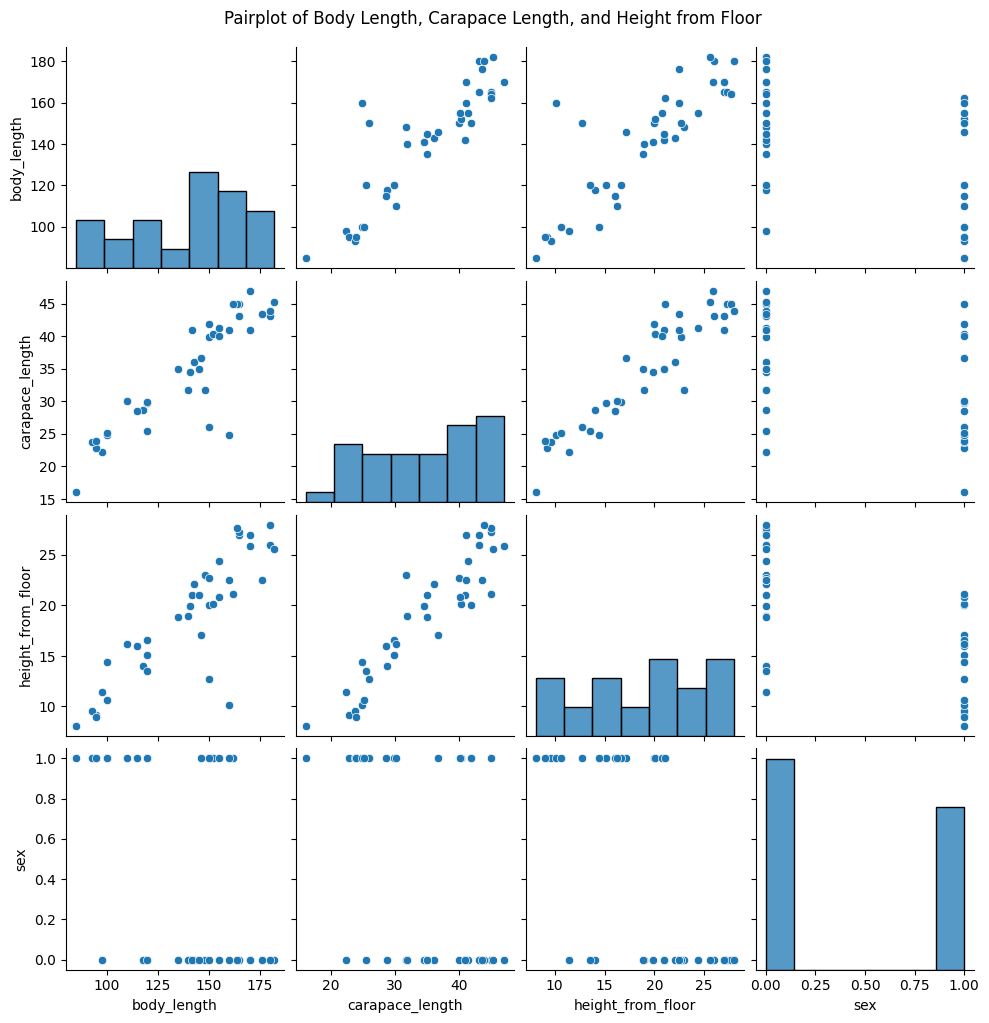

(1.7602331101945505,
 2.201597145403953,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:      height_from_floor   R-squared:                       0.912
 Model:                            OLS   Adj. R-squared:                  0.894
 Method:                 Least Squares   F-statistic:                     51.75
 Date:                Thu, 29 Aug 2024   Prob (F-statistic):           2.19e-12
 Time:                        11:44:03   Log-Likelihood:                -61.516
 No. Observations:                  31   AIC:                             135.0
 Df Residuals:                      25   BIC:                             143.6
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------

In [1]:
# Converting categorical variable 'sex' to numeric for the purpose of analysis

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_excel(r"C:\Users\gbo10\Videos\heights stats.xlsx")



df['sex'] = df['sex'].astype('category').cat.codes

# Re-attempting the pairplot with the cleaned and converted data
sns.pairplot(df)
plt.suptitle('Pairplot of Body Length, Carapace Length, and Height from Floor', y=1.02)
plt.show()

# Proceeding with the regression analysis as planned
# Splitting the data into training and testing sets
X = df[['body_length', 'carapace_length']]
y = df['height_from_floor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fitting the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predicting and calculating error
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Summary of the model using statsmodels
X_poly_train_sm = sm.add_constant(X_poly_train)
ols_model = sm.OLS(y_train, X_poly_train_sm).fit()

# Display the results
train_rmse, test_rmse, ols_model.summary()


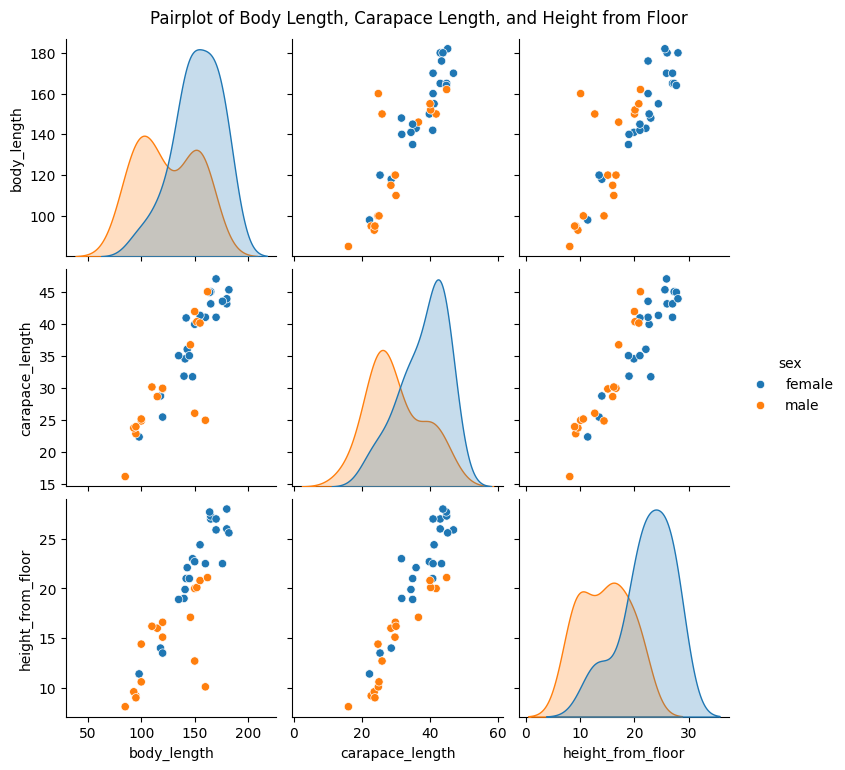

InvalidParameterError: The 'stratify' parameter of train_test_split must be an array-like or None. Got True instead.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel(r"C:\Users\gbo10\Videos\heights stats.xlsx")

# Create pairplot
sns.pairplot(df, hue='sex')
plt.suptitle('Pairplot of Body Length, Carapace Length, and Height from Floor', y=1.02)
plt.show()

# Prepare the features and target
X = df[['body_length', 'carapace_length', 'sex']]
y = df['height_from_floor']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify= test_size=0.2, random_state=42)

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PolynomialFeatures(degree=2), ['body_length', 'carapace_length']),
        ('cat', OneHotEncoder(drop='first'), ['sex'])
    ])

# Create a pipeline that includes preprocessing and the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predict and calculate error
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Prepare data for statsmodels summary
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_sm = sm.add_constant(X_train_preprocessed)

# Fit statsmodels OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Display the results
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(ols_model.summary())

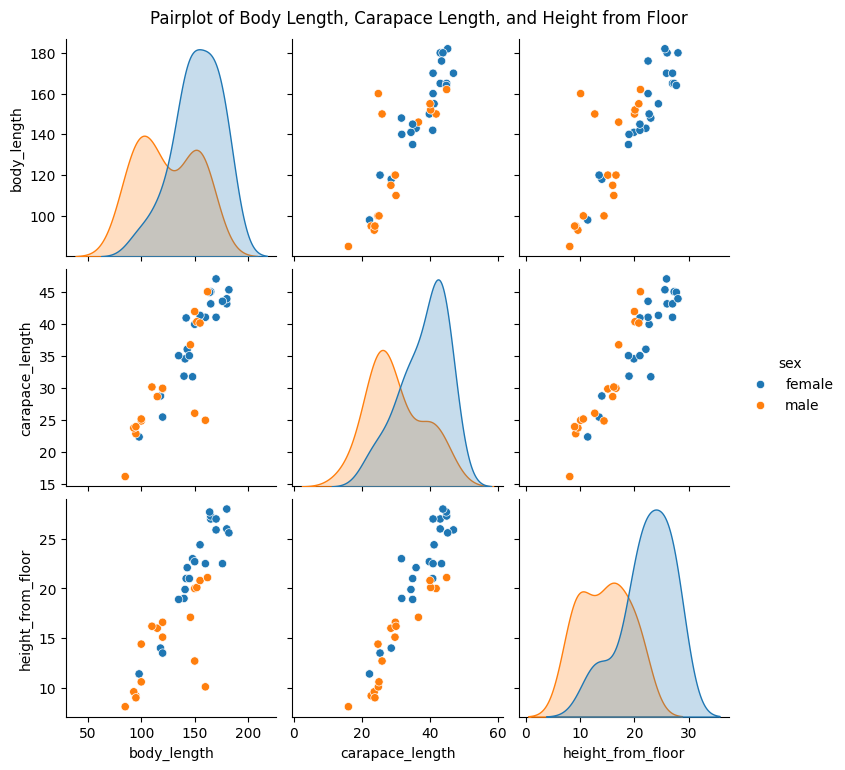

Train RMSE: 1.8541737487155006
Test RMSE: 1.5641119781846198
                            OLS Regression Results                            
Dep. Variable:      height_from_floor   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     83.07
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           9.45e-14
Time:                        12:38:12   Log-Likelihood:                -63.128
No. Observations:                  31   AIC:                             134.3
Df Residuals:                      27   BIC:                             140.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel(r"C:\Users\gbo10\Videos\heights stats.xlsx")

# Create pairplot
sns.pairplot(df, hue='sex')
plt.suptitle('Pairplot of Body Length, Carapace Length, and Height from Floor', y=1.02)
plt.show()

# Prepare the features and target
# X = df[['body_length', 'carapace_length', 'sex']]

X = df[[ 'carapace_length', 'sex']]
y = df['height_from_floor']

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PolynomialFeatures(degree=2), [ 'carapace_length']),
        ('cat', OneHotEncoder(drop='first'), ['sex'])
    ])

# Create a pipeline that includes preprocessing and the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predict and calculate error
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Prepare data for statsmodels summary
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_sm = sm.add_constant(X_train_preprocessed)

# Fit statsmodels OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Display the results
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(ols_model.summary())

# Function to predict height from floor


In [11]:
#save model
import joblib
joblib.dump(model, 'height_from_floor_model.pkl')



['height_from_floor_model.pkl']

In [13]:
# After fitting the model, add this code to extract and display the function

# Get feature names
poly_features = ['1', 'body_length', 'carapace_length', 'body_length^2', 'body_length*carapace_length', 'carapace_length^2']
feature_names = ['const'] + poly_features + ['sex_female']  # Assuming 'male' is the reference category

# Get coefficients
coeffs = ols_model.params

# Create the function string
function = "height_from_floor = "
terms = []

for name, coeff in zip(feature_names, coeffs):
    if abs(coeff) > 1e-10:  # Ignore very small coefficients
        if name == 'const':
            terms.append(f"{coeff:.4f}")
        elif name == 'sex_female':
            terms.append(f"{coeff:.4f} * (sex == 'female')")
        elif '^2' in name:
            variable = name.split('^')[0]
            terms.append(f"{coeff:.4f} * {variable}^2")
        elif '*' in name:
            var1, var2 = name.split('*')
            terms.append(f"{coeff:.4f} * {var1} * {var2}")
        else:
            terms.append(f"{coeff:.4f} * {name}")

function += " + ".join(terms)

print("Regression function:")
print(function)

Regression function:
height_from_floor = -5.8860 + 0.1644 * 1 + 0.1809 * body_length + -0.0023 * carapace_length + 0.0160 * body_length^2 + -0.0302 * body_length * carapace_length + -1.5383 * carapace_length^2


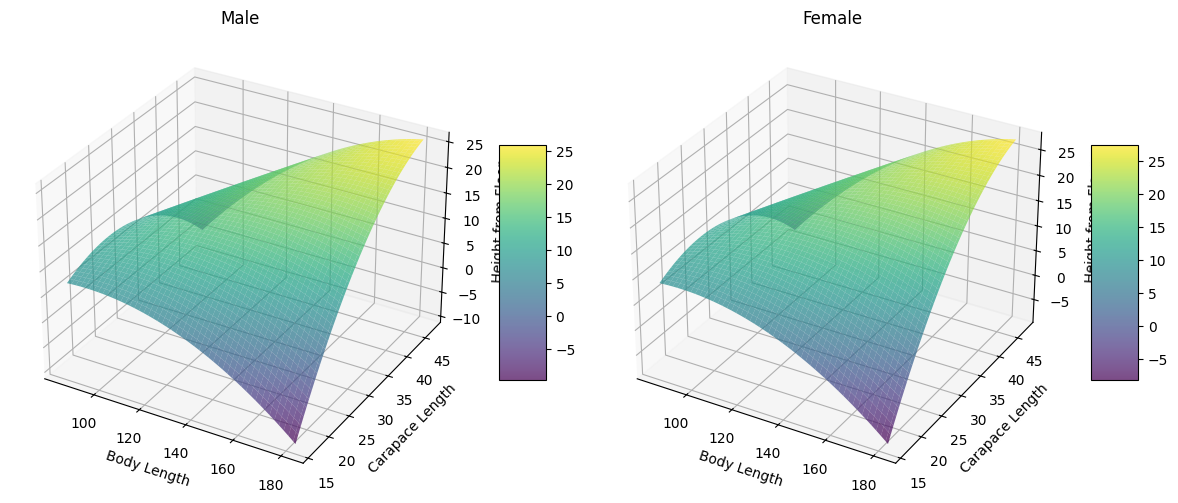

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a mesh grid for body_length and carapace_length
body_length = np.linspace(X['body_length'].min(), X['body_length'].max(), 100)
carapace_length = np.linspace(X['carapace_length'].min(), X['carapace_length'].max(), 100)
body_length, carapace_length = np.meshgrid(body_length, carapace_length)

# Create input data for both sexes
X_male = pd.DataFrame({
    'body_length': body_length.ravel(),
    'carapace_length': carapace_length.ravel(),
    'sex': 'male'
})

X_female = pd.DataFrame({
    'body_length': body_length.ravel(),
    'carapace_length': carapace_length.ravel(),
    'sex': 'female'
})

# Predict heights
Z_male = model.predict(X_male).reshape(body_length.shape)
Z_female = model.predict(X_female).reshape(body_length.shape)

# Create the 3D plot
fig = plt.figure(figsize=(12, 5))

# Male surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(body_length, carapace_length, Z_male, cmap='viridis', alpha=0.7)
ax1.set_xlabel('Body Length')
ax1.set_ylabel('Carapace Length')
ax1.set_zlabel('Height from Floor')
ax1.set_title('Male')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Female surface
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(body_length, carapace_length, Z_female, cmap='viridis', alpha=0.7)
ax2.set_xlabel('Body Length')
ax2.set_ylabel('Carapace Length')
ax2.set_zlabel('Height from Floor')
ax2.set_title('Female')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [16]:
def predict_height(body_length, carapace_length, sex):
    """
    Predict height from floor based on body length, carapace length, and sex.
    
    Parameters:
    body_length (float): Body length in cm
    carapace_length (float): Carapace length in cm
    sex (str): 'male' or 'female'
    
    Returns:
    float: Predicted height from floor in cm
    """
    input_data = pd.DataFrame({
        'body_length': [body_length],
        'carapace_length': [carapace_length],
        'sex': [sex]
    })
    return model.predict(input_data)[0]

# Example usage of the prediction function
print("\nExample prediction:")
print(f"Predicted height: {predict_height(180, 63, 'male'):.2f} mm")


Example prediction:
Predicted height: 27.87 mm


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Load the Excel file
df = pd.read_excel(r"C:\Users\gbo10\Videos\heights stats.xlsx")

# Convert categorical variable 'sex' to numeric (one-hot encoding)
df['sex'] = df['sex'].astype('category').cat.codes

# Selecting features for the regression model
X = df[['carapace_length', 'sex']]

# One-hot encode the 'sex' variable
X = pd.get_dummies(X, columns=['sex'], drop_first=True)

# Ensuring all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(df['height_from_floor'], errors='coerce')

# Dropping any rows with NaN values that may have been introduced
X = X.dropna()
y = y.loc[X.index]

# Check data types
print("Data types of X:")
print(X.dtypes)
print("Data types of y:")
print(y.dtypes)

# Ensure all data is cast to numpy array to avoid dtype issues
X_np = X.values
y_np = y.values

# Check if conversion to numpy array worked
print("Numpy array types of X:", X_np.dtype)
print("Numpy array types of y:", y_np.dtype)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42, stratify=)

# Performing Linear Regression using sklearn for comparison
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting and calculating error for linear regression
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

train_rmse_linear = np.sqrt(mean_squared_error(y_train, y_pred_train_linear))
test_rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_test_linear))

print("Train RMSE:", train_rmse_linear)
print("Test RMSE:", test_rmse_linear)


print(f'R^2: {linear_model.score(X_train, y_train)}')   


# Summary using statsmodels for linear regression
# X_train_sm = sm.add_constant(X_np)
# ols_model_linear = sm.OLS(y_np, X_train_sm).fit()

# # Displaying the results
# print(ols_model_linear.summary())


Data types of X:
carapace_length    float64
sex_1                 bool
dtype: object
Data types of y:
float64
Numpy array types of X: object
Numpy array types of y: float64
Train RMSE: 1.8590148433558922
Test RMSE: 1.5920159112720693
R^2: 0.9017330780319408


In [32]:
import joblib
joblib.dump(linear_model, 'height_from_floor_model_linear_good.pkl')

['height_from_floor_model_linear.pkl']

In [29]:
def predict_height( carapace_length, sex):
    """
    Predict height from floor based on body length, carapace length, and sex.
    
    Parameters:
    body_length (float): Body length in cm
    carapace_length (float): Carapace length in cm
    sex (str): 'male' or 'female'
    
    Returns:
    float: Predicted height from floor in cm
    """
    input_data = pd.DataFrame({
        
        'carapace_length': [carapace_length],
        'sex': [sex]
    })
    return linear_model.predict(input_data)[0]

# Example usage of the prediction function
print("\nExample prediction:")
print(f"Predicted height: {predict_height( 63,0):.2f} mm")


Example prediction:
Predicted height: 36.64 mm


c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Load the Excel file
df = pd.read_excel(r"C:\Users\gbo10\Videos\heights stats.xlsx")

# Convert categorical variable 'sex' to numeric (one-hot encoding)
df['sex'] = df['sex'].astype('category').cat.codes

# Selecting features for the regression model
X = df[['carapace_length', 'sex']]  # Keep the 'sex' column for stratification

# One-hot encode the 'sex' variable
X_encoded = pd.get_dummies(X, columns=['sex'], drop_first=True)

# Ensuring all data is numeric
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(df['height_from_floor'], errors='coerce')

# Dropping any rows with NaN values that may have been introduced
X_encoded = X_encoded.dropna()
y = y.loc[X_encoded.index]

# Ensure all data is cast to numpy array to avoid dtype issues
X_np = X_encoded.values
y_np = y.values

# Splitting the data into training and testing sets, stratified by the original 'sex' column
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42, stratify=X['sex'])

# Performing Linear Regression using sklearn for comparison
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting and calculating error for linear regression
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

train_rmse_linear = np.sqrt(mean_squared_error(y_train, y_pred_train_linear))
test_rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_test_linear))

print("Train RMSE:", train_rmse_linear)
print("Test RMSE:", test_rmse_linear)

print(f'R^2: {linear_model.score(X_train, y_train)}')   

# Summary using statsmodels for linear regression (optional)
# X_train_sm = sm.add_constant(X_np)
# ols_model_linear = sm.OLS(y_np, X_train_sm).fit()

# # Displaying the results
# print(ols_model_linear.summary())


    carapace_length  sex_1
0              47.0  False
1              31.7  False
2              43.1  False
3              43.1  False
4              36.0  False
5              39.9  False
6              45.0  False
7              44.9  False
8              41.0  False
9              41.0  False
10             34.5  False
11             41.3  False
12             31.8  False
13             35.0  False
14             16.1   True
15             41.9   True
16             36.7   True
17             45.3  False
18             43.9  False
19             40.9  False
20             28.7  False
21             35.0  False
22             22.3  False
23             43.5  False
24             25.4  False
25             28.6   True
26             40.3   True
27             40.1   True
28             29.8   True
29             29.9   True
30             45.0   True
31             30.1   True
32             26.0   True
33             22.8   True
34             23.7   True
35             24.8   True
3

In [47]:
df

,body_length,carapace_length,height_from_floor,sex
0,170,47.0,25.9,0
1,148,31.7,23.0,0
2,180,43.1,26.0,0
3,165,43.1,27.0,0
4,143,36.0,22.1,0
5,150,39.9,22.7,0
6,165,45.0,27.3,0
7,164,44.9,27.7,0
8,170,41.0,27.0,0
9,160,41.0,22.5,0


In [38]:
X_encoded

,carapace_length,sex_1
0,47.0,False
1,31.7,False
2,43.1,False
3,43.1,False
4,36.0,False
5,39.9,False
6,45.0,False
7,44.9,False
8,41.0,False
9,41.0,False


In [40]:
import joblib
joblib.dump(linear_model, 'height_from_floor_model_linear_good.pkl')

['height_from_floor_model_linear_good.pkl']

In [46]:
def predict_height( carapace_length, sex):
    """
    Predict height from floor based on body length, carapace length, and sex.
    
    Parameters:
    body_length (float): Body length in cm
    carapace_length (float): Carapace length in cm
    sex (str): 'male' or 'female'
    
    Returns:
    float: Predicted height from floor in cm
    """
    input_data = pd.DataFrame({
        
        'carapace_length': [carapace_length],
        'sex': [sex]
    })
    return linear_model.predict(input_data)[0]

# Example usage of the prediction function
print("\nExample prediction:")
print(f"Predicted height: {predict_height( 47,1):.2f} mm")


Example prediction:
Predicted height: 24.07 mm


c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [42]:
intercept = linear_model.intercept_
coefficients = linear_model.coef_

# Assuming the features are ['carapace_length', 'sex_1'] after encoding
print(f"Regression equation: height_from_floor = {intercept:.2f} + {coefficients[0]:.2f} * carapace_length + {coefficients[1]:.2f} * sex_1")

Regression equation: height_from_floor = 1.50 + 0.54 * carapace_length + -3.02 * sex_1
